# Utilisation des biblioth√®ques "scientifiques"

Le but de ce deuxi√®me notebook est de mettre en oeuvre les diff√©rents modules propos√©s par la biblioth√®que `NumPy` (Numerical Python), `Matplotlib` (pour le trac√© des figures) et `SciPy` (Scientific Python).

On commence par importer ces *packages*

In [1]:
# to make the plots appear and be stored within the notebook
%matplotlib inline

import math
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import signal

## Vectoriser les op√©rations

Une bonne utilisation de la biblioth√®que NumPy consiste √† fair le moins de boucles `for` pour effectuer des op√©rations sur les matrices et les vecteurs. En r√©alit√©, cette librairie offre des op√©rations "vectoris√©es". L'exemple le plus simple est l'addition d'un scalaire √† un vecteur :
```python
import numpy as np

mat = np.array([1, 2, 3, 4])
scl = 10 
res = mat + scl
print(res)
>>> [11, 12, 13, 14]
```

Si on voulait faire cette op√©ration sans utiliser NumPy, on aurait eu besoin d'utiliser une boucle `for`...

Vectoriser le code ci-dessous :

In [2]:
n = 20
x_loop, y_loop = np.zeros(n), np.zeros(n)
dx = 2.0/(n-1)
for i in range(n):
    x_loop[i] = -1 + dx*i
    y_loop[i] = math.exp(-x_loop[i])*x_loop[i]

In [10]:
x = np.linspace(-1, 1, n)
y = x*np.exp(-x)

print(np.array_equal(x_loop, x))
print(np.array_equal(y_loop, y))

True
True


## Densit√©s de flux spectrales

Lors de la premi√®re s√©ance, vous avez impl√©ment√© la fonction `planck_law(wave_length, temp)` qui permet de calculer la densit√© de flux spectrale en fonction de $\lambda$ et $T$. On la red√©finit ci-dessous.

*Vous remarquerez que nous avons cette fois-ci utilis√©* `np.exp` *au lieu de* `math.exp`*, bien s√ªr le r√©sultat est le m√™me*

In [4]:
def planck_law(wave_length:float, temp:float)->float:
    """
    Computes the spectral flux density derived from Planck's law and depending on two parameters
    Args:
        wave_length (in micrometers): wave length
        temp (in K): temperature of the radiant body
    """
    c_1 = 3.742*10**8
    c_2 = 14388
    
    if wave_length*temp<50:
        return 0
    else:
        term_1 = c_1/wave_length**5
        term_2 = np.exp(c_2/(wave_length*temp))-1
        return term_1/term_2

### Trac√© des densit√©s spectrales en fonction de $\lambda$ et $T$

Gr√¢ce aux fonctions `np.arange` et `planck_law` cr√©er deux variables `x` et `phi` telles que :

* `x` : doit contenir les valeurs des longueurs d'onde dans $[0.1;~10]~\mu m$ avec un pas de $0.05 \mu m$ (*la valeur $3~\mu m$ doit √™tre inclue dans x*).
* `phi` : une liste qui contient la valeur de denist√© de flux spectrale $\phi_{\lambda}^0(T)$ correspondant √† chaque $\lambda$ dans `x`. On prendra $T=1500~K$.

In [5]:
x = np.arange(0.1, 10.05, 0.05)
phi = [planck_law(l, 1500) for l in x]

A l'aide de la biblioth√®que Matplotlib et notamment la fonction `plot`, tracez l'√©volution de $\phi_{\lambda}^0(T)$ en fonction de $\lambda$.\\
Pensez √† bien mettre les titres des axes, le titre de la figure ainsi que d'afficher la grille. Aidez vous de la documentation [en ligne](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) !

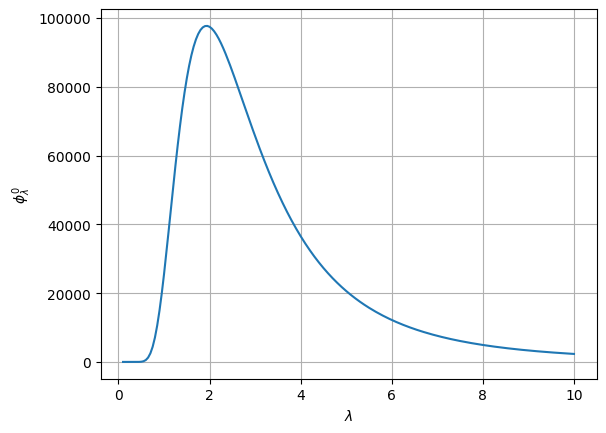

In [6]:
plt.plot(x, phi)
plt.ylabel(r'$\phi_{\lambda}^0$')
plt.xlabel(r'$\lambda$')
plt.grid()
plt.show()

### Densit√© de flux totale √©mise par le corps noir

La densit√© de flux totale √©mise par le corps noir se calcule en int√©grant la loi de Planck sur l‚Äôespace des longueurs d‚Äôonde et s‚Äôexprime en W.m‚àí2 :
$$
\phi^0 \left(T\right) = \int_0^{+\infty} \phi_{\lambda}^0(T) d \lambda
$$

La solution analytique est donn√©e par : 
$$
\phi^0 \left(T\right) = \sigma T^4
$$
Avec $\sigma = 5.67.10^{-8} W.m^{-2}.K^{-4}$

A l'aide de la fonction `scipy.integrate.quad` calculer $\phi^0 \left(T\right)$ pour T = 300 K, T = 1500 K et T = 5780 K. Comparer avec la solution analytique. Quelle remarque peut-on faire sur l'erreur relative d'approximation ?

*PS: SciPy permet le calcul d'int√©grales impropres, l'argument $\infty$* peut √™tre appel√© via `np.inf`

In [7]:
from scipy import integrate

sigma = 5.67*10**(-8)

for temp in [300, 1500, 5780]:
    print(f'R√©sultats pour T = {temp} K:')
    ana_val = sigma*temp**4
    num_val = integrate.quad(planck_law, 0, np.inf, args=(temp,))[0]
    rel_error = 100*abs(num_val-ana_val)/ana_val
    print('\tSolution analytique (W.m-2): {:.2f}\n\tApproximation num√©rique (W.m-2): {:.2f}\n\tErreur relative (%): {:.3f}'.format(ana_val, num_val, rel_error))
    print('*****')

R√©sultats pour T = 300 K:
	Solution analytique (W.m-2): 459.27
	Approximation num√©rique (W.m-2): 459.30
	Erreur relative (%): 0.006
*****
R√©sultats pour T = 1500 K:
	Solution analytique (W.m-2): 287043.75
	Approximation num√©rique (W.m-2): 287061.75
	Erreur relative (%): 0.006
*****
R√©sultats pour T = 5780 K:
	Solution analytique (W.m-2): 63284071.50
	Approximation num√©rique (W.m-2): 63288040.87
	Erreur relative (%): 0.006
*****


## Produit de convolution

La notion de produit de convolution vous a √©t√© introduite cette ann√©e lors des cours de maths. Pour rappel, soit $f$ et $g$ deux fonctions d√©finies sur $\mathbb{R}$. Sous r√©serve d'existence, on d√©finit le produit de convolution de $f$ et $g$ comme la fonction :
$$
f * g : t \longrightarrow \int_{-\infty}^{+\infty} f(\tau) g(t-\tau) ~ d \tau.
$$

Dans l'exercice I.14, nous avons d√©termin√© le produit de convolution $f * f$ o√π :
$$
f : t \longrightarrow \left\{ \begin{array}{ll}
        1  & \text{si}~~ t \in [-a,~a],\\
        0 & \text{sinon}.
    \end{array}
    \right.
$$

A l'aide de la fonction `convolve`du module `signal` de SciPy, r√©aliser ce produit de convolution et afficher les r√©sultats obtenus √† l'aide de Matplotlib (en utilisant le module `subplot`).

*Vous pouvez utiliser la fonction `repeat` de NumPy afin de cr√©er la fonction $f$*.

In [8]:
# On cr√©e la fonction f avec une largeur de porte √©gale √† 100 (a=50)
a=50
sig = np.repeat([0.,1.,0.], 2*a)
sig_x = np.linspace(-3*a, 3*a, sig.size)
# On r√©alise ensuite le produit de convolution de f avec elle m√™me
filtered = signal.convolve(sig, sig)
filt_x = np.linspace(-6*a, 6*a, filtered.size)

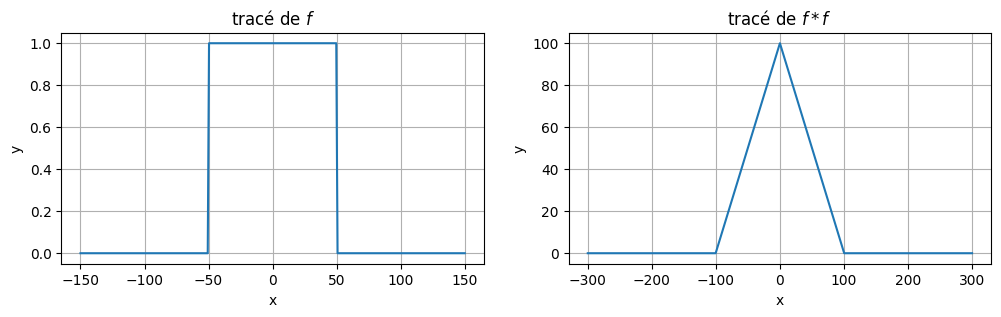

In [9]:
# On affiche f et f*f
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3))
ax1.plot(sig_x, sig)
ax1.set_title(r'trac√© de $f$')
ax1.set(xlabel='x', ylabel='y')
ax1.grid()
ax2.plot(filt_x, filtered)
ax2.set_title(r'trac√© de $f*f$')
ax2.set(xlabel='x', ylabel='y')
ax2.grid()
plt.show()

## üå∂Ô∏è Calcul des pertes de charge r√©guli√®res

Lors d'un √©coulement d'un fluide dans une conduite et en l'absence de singularit√©s (coude, obstacle...), celui-ci voit son √©nergie totale diminuer √† cause des pertes visqueuses (frottement avec les canalisations). Cette quantit√© d'√©nergie perdue, qu'on appelle pertes de charge, peut √™tre calcul√©e via un bilan d'√©nergie sur la conduite (Th. de Bernoulli g√©n√©) :
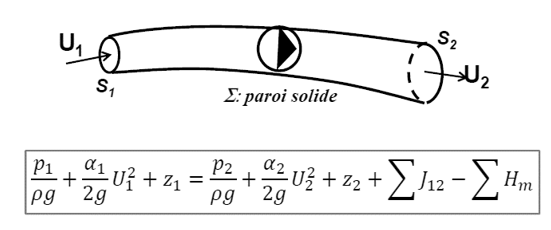
* $J_{12}$ : pertes de charge positive entre les deux sections.
* $H_m$ : hauteur manom√©trique des machines hydrauliques $\left(\frac{\dot{W}}{g.\dot{m}}\right)$.
* $\alpha$ : coefficient d'√©nergie cin√©tique, c'est un facteur de correction appliqu√© pour tenir compte de la forme r√©elle du profil de vitesse dans la conduite.

Il est possible de montrer que les pertes de charge peuvent se calculer via :
$$
J_{12} = \lambda \cdot \frac{L}{D_h} \cdot \frac{u^2}{2g}
$$

O√π $\lambda$ repr√©sente le coefficient de pertes de charge de l'√©quation de Darcy-Weisbach, et qui se calcule dans le cas g√©n√©ral via la formule implicite de Colebrook :
$$
\frac{1}{\sqrt{\lambda}} = -2\text{log} \left(\frac{\epsilon}{3.71D} + \frac{2.51}{\text{Re}\sqrt{\lambda}} \right)
$$
$$
\text{Re} = \frac{\rho u D_h}{\mu}
$$
O√π $\epsilon$ est la rugosit√© de surface (en mm) dont l'effet est d'augmenter les pertes de charge, $D_h$ le diam√®tre hydraulique et $u$ la vitesse d√©bitante au sein de la conduite.

A l'aide de `scipy.optimize.fsolve` et d'autres modules utiles de NumPy, impl√©menter un code qui permet de calculer le coefficient de pertes de charge avec comme donn√©es d'entr√©es : $\dot{m}, \rho, \mu, \epsilon, D_h$

In [40]:
from scipy.optimize import fsolve, newton

def colebrook_equation(lamb, reynolds, eps, d):
    """
    Colebrook equation for friction factor.

    Args:
    - lamn: friction factor
    - reynolds: Reynolds number
    - eps: rugosity of the pipe (m)
    - d: inner diameter of the canalisation (m) 

    Returns:
    - Residual value to be minimized
    """
    term_1 = 1.0/np.sqrt(lamb)
    term_2 = 2*np.log10((eps/(3.7*d))+(2.51/(reynolds*np.sqrt(lamb))))
    
    return term_1+term_2

def colebrook_friction_factor(m, rho, mu, eps, d):
    """
    Calculate the Darcy friction factor using the Colebrook equation.

    Parameters:
    - m: mass flow rate in the pipe (kg/s)
    - rho: fluid density (kg/m3)
    - mu: fluid dynamic viscosity (Pa.s)
    - eps: rugosity of the pipe (m)
    - d: inner diameter of the canalisation (m)

    Returns:
    - friction_factor (float): Darcy friction factor.
    """
    
    v = 4*m/(rho*(np.pi*d**2))
    re = rho*v*d/mu
    print('Velocity', v)
    print('Reynolds', re)

    # Initial guess for fsolve
    initial_guess = 0.01 # Initial guess for the friction factor

    # Solve using fsolve
    friction_factor_solution = fsolve(colebrook_equation, initial_guess, args=(re, eps, d))[0]

    return friction_factor_solution

# Example usage:
mass_flow_example = 23.5  # kg/s
diameter_example = 0.3  # m
rugosity_example = 0.0015  # m
viscosity_example = 0.001  # Pa.s
density_example = 1000  # kg/m^3

friction_factor_result = colebrook_friction_factor(
    m=mass_flow_example, 
    rho=density_example,
    mu=viscosity_example,
    eps=rugosity_example,
    d=diameter_example
)
print(f"The Darcy friction factor is: {friction_factor_result}")


Velocity 0.33245699223640357
Reynolds 99737.09767092105
The Darcy friction factor is: 0.031308757742079
